## Quick demo of McStasScript calculator
The base classes from SimEx were taken from SimEx, and modified to work independently from SimEx. A McStas calculator and parameter class was made, inheriting from the relevant abstract classes. This is a work in progress, and does no checks of the user input yet, but serves to share the current state for early feedback.

### Requirements
- McStas installation: https://github.com/McStasMcXtrace/McCode/tree/master/INSTALL-McStas
- McStasScript: https://github.com/PaNOSC-ViNYL/McStasScript (pip install mcstasscript)
- Base classes in same folder as notebook, distributed as compressed folder

In [1]:
import McStasCalculator
import McStasParameters

from mcstasscript.interface import instr, plotter

### Set up McStas instrument
The McStas instrument is set up before the calculator using normal McStasScript syntax. Here just a source and detector is added.

In [2]:
instrument = instr.McStas_instr("mcstas_instrument_name", input_path="input_folder")

instrument.add_parameter("energy")

src = instrument.add_component("Source", "Source_simple")
src.xwidth = 0.1
src.yheight = 0.1
src.E0 = "energy"
src.dist = 2.0
src.focus_xw = 0.03
src.focus_yh = 0.03

det = instrument.add_component("Detector", "PSD_monitor")
det.xwidth = 0.03
det.yheight = 0.03
det.filename = "\"psd.dat\""
det.set_AT([0, 0, 2.0], RELATIVE="Source")

The following components are found in the work_directory / input_path:
     Union_master.comp
These definitions will be used instead of the installed versions.


### Parameter object
A parameter object of type McStasParameters is made, this class inherits from AbstractCalculatorParameters directly.

It needs a McStasScript instrument, parameters and options necessary for a McStas run.

In [3]:
pars = McStasParameters.McStasParameters(instrument=instrument, pars={"energy": 10},
                                         ncount=1E7, mpi=4, increment_folder_name=True)

### Calculator object
A calculator object of type McStasCalculator is made, this class inherits from AbstractBaseCalculator. The input_path is not yet used, but the output path is used as data folder from McStas.

In [4]:
calculator = McStasCalculator.McStasCalculator(parameters=pars,
                                               input_path='.',
                                               output_path='test_output')

### Running a calculation
As I understand it, the backengine method of the Calculator class should run the simulation and return data. This is demonstrated here, and the McStasScript plotter is used to display the result.

running mcrun from:  /Users/madsbertelsen/PaNOSC/CodeWorkshop_April_2020/code/McStasScriptTest/input_folder
INFO: Using directory: "/Users/madsbertelsen/PaNOSC/CodeWorkshop_April_2020/code/McStasScriptTest/test_output_9"
INFO: Regenerating c-file: mcstas_instrument_name.c
CFLAGS=
INFO: Recompiling: ./mcstas_instrument_name.out
INFO: ===
INFO: Placing instr file copy mcstas_instrument_name.instr in dataset /Users/madsbertelsen/PaNOSC/CodeWorkshop_April_2020/code/McStasScriptTest/test_output_9

Simulation 'mcstas_instrument_name' (mcstas_instrument_name.instr): running on 4 nodes (master is 'CI0020872', MPI version 2.1).
Detector: Detector_I=0.0224796 Detector_ERR=7.10867e-06 Detector_N=1e+07 "psd.dat"

number of elements in data list = 1
Plotting data with name Detector


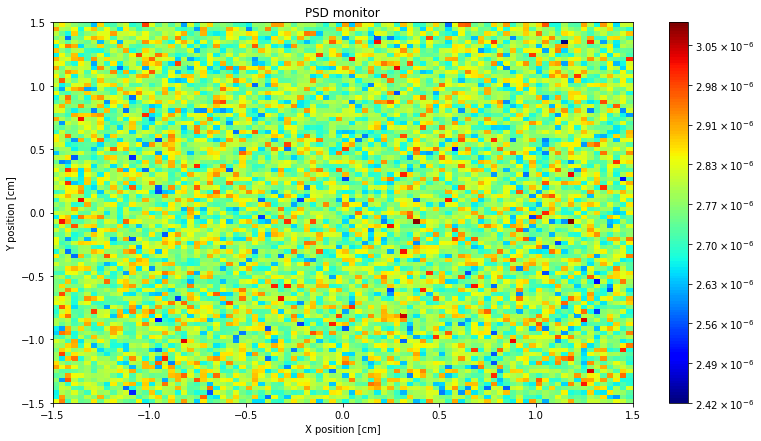

In [5]:
data = calculator.backengine()
plotter.make_sub_plot(data)